In [ ]:
"""
linear regression
-find diff between expected y value and actual y value for data input
-diff^2 = mean squared error
-find gradient
-set to 0, find slope and intercept (where mean squared error is minimized)
"""

m:  0.987878787878788
b:  1.466666666666666
predicted value of x1:  [4.43030303]


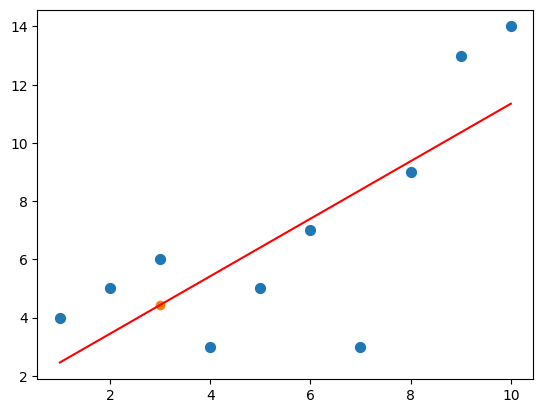

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([4, 5, 6, 3, 5, 7, 3, 9, 13, 14])

#s = size
plt.scatter(x,y,s=50)
plt.savefig("before.png")
plt.clf()

model = LinearRegression()
model.fit(x,y)

b = model.intercept_
m = model.coef_[0]

model.score(x,y)

print("m: ", m)
print("b: ",b)
plt.plot(x, x*m + b, 'r')
plt.scatter(x,y,s=50)

x1 = np.array([3]).reshape(-1, 1)
print("predicted value of x1: ", model.predict(x1))
plt.scatter(x1, model.predict(x1))

plt.savefig("after.png")

#find data, see if you can fit linear regression line to it
#predict



<ipython-input-6-26b695fb798d>:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('ufo_sighting.csv', usecols=['latitude', 'longitude '])


predicted value of x1:  [-104.34346514]


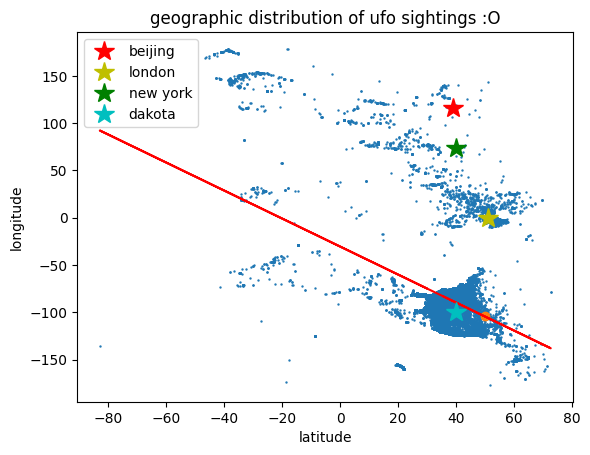

In [ ]:
#hw
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#handle mixed types
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufo_sighting.csv', usecols=['latitude', 'longitude '])

# stringed numbers to integers. invalid becomes NaN
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude '] = pd.to_numeric(data['longitude '], errors='coerce')

# remove rows with NaN values
data = data.dropna(subset=['latitude', 'longitude '])

X = data[['latitude', 'longitude']].values

# Create and fit the k-means model
kmeans = KMeans(n_clusters=2, random_state=100)
kmeans.fit(X)

# Get cluster assignments
data['cluster'] = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

x = data['latitude'].values
y = data['longitude '].values

plt.scatter(x,y,s=50)
plt.savefig("before1.png")
plt.clf()

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)

b = model.intercept_
m = model.coef_[0]

model.score(x.reshape(-1, 1), y)
plt.plot(x, x*m + b, 'r')
plt.scatter(x,y,s=0.5)

plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('geographic distribution of ufo sightings :O')

x1 = np.array([50]).reshape(-1, 1)
print("predicted value of x1: ", model.predict(x1))
plt.scatter(x1, model.predict(x1))
plt.plot(39, 116, 'r*', markersize=15, label='beijing')
plt.plot(51,0.1, 'y*', markersize=15, label='london')
plt.plot(40,74, 'g*', markersize=15, label='new york')
plt.plot(40,-100, 'c*', markersize=15, label='dakota')
plt.savefig("after.png")

plt.legend()

#kmeans clustering for 2, then 2 linear regressions


<ipython-input-18-358ea4b65e01>:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufo_sighting.csv', usecols=['latitude', 'longitude '])


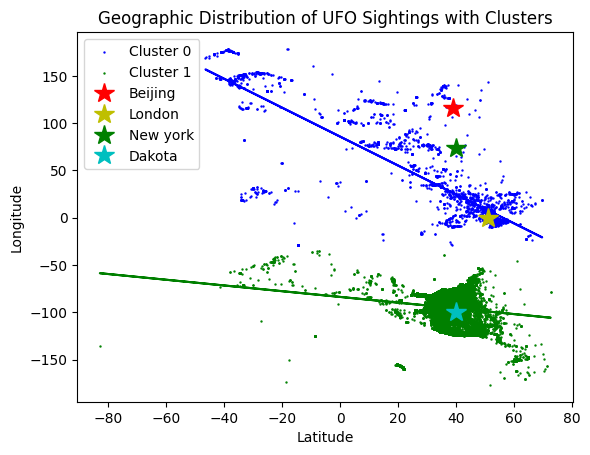

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# read and clean data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ufo_sighting.csv', usecols=['latitude', 'longitude '])

# convert to numeric
data['latitude'] = pd.to_numeric(data['latitude'], errors='coerce')
data['longitude '] = pd.to_numeric(data['longitude '], errors='coerce')

# remove NaN values
data = data.dropna(subset=['latitude', 'longitude '])

# prepare data for clustering
X = np.column_stack((data['latitude'], data['longitude ']))

# create and fit k-means
kmeans = KMeans(n_clusters=2, random_state=100)
data['cluster'] = kmeans.fit_predict(X)

# get centers
centers = kmeans.cluster_centers_

# separate data by cluster
cluster0 = data[data['cluster'] == 0]
cluster1 = data[data['cluster'] == 1]

# create separate linear regressions for each cluster
model0 = LinearRegression()
model1 = LinearRegression()

# fit models
model0.fit(cluster0['latitude'].values.reshape(-1, 1), cluster0['longitude '].values)
model1.fit(cluster1['latitude'].values.reshape(-1, 1), cluster1['longitude '].values)

# Get coefficients
m0 = model0.coef_[0]
b0 = model0.intercept_
m1 = model1.coef_[0]
b1 = model1.intercept_

# plot points by cluster
plt.scatter(cluster0['latitude'], cluster0['longitude '], c='blue', s=0.5, label='Cluster 0')
plt.scatter(cluster1['latitude'], cluster1['longitude '], c='green', s=0.5, label='Cluster 1')

# plot regression lines using mx + b format
x0 = cluster0['latitude'].values
x1 = cluster1['latitude'].values
plt.plot(x0, x0*m0 + b0, 'b')
plt.plot(x1, x1*m1 + b1, 'g')

# add cities, legend, and pretty stuff :)
plt.plot(39, 116, 'r*', markersize=15, label='Beijing')
plt.plot(51, 0.1, 'y*', markersize=15, label='London')
plt.plot(40, 74, 'g*', markersize=15, label='New york')
plt.plot(40, -100, 'c*', markersize=15, label='Dakota')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Geographic Distribution of UFO Sightings with Clusters')
plt.legend()

plt.savefig("clustered_regression.png")
plt.show()